# TEXT ANALYTICS GROUP ASSIGNMENT #2

#### Group Members: Brooks Beckelman, Zack Bilderback, Dallas Griffin, Estevan Gonzalez, Sean Kessel, Davis Townsend

In [2]:
import pandas as pd
from pandas import Series, DataFrame
%pylab inline

import seaborn as sns

import sklearn
from sklearn.cross_validation import train_test_split
from sklearn import linear_model
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

Populating the interactive namespace from numpy and matplotlib


In [3]:
yelp = pd.read_csv('YelpData.csv')

In [4]:
# Convert rating to high (4,5) or low (1,2,3) for binary classification
yelp['rating'] = np.where(yelp['stars'] >= 4, 'high','low')
yelp.head(1)

,stars,votes_cool,votes_funny,votes_useful,Cheap,Moderate,Expensive,VeryExpensive,American,Chinese,...,Indian,Italian,Greek,Mediterranean,Mexican,Thai,Vietnamese,Others,Review,rating
0,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,This location is out of business. I drove by i...,low


## Task A: Model Using Numeric Data Only

### Approach:
To assess the predictive power of the numerical data, we will isolate it from the actual reviews and build a few different models. These models will be fit to a training set of 75% of the data and then used to predict a test set of the remaining 25%. The accuracy of these predictions compared to a base case (predicting all reviews to have a 'high' rating) should give us an idea of the out-of-sample predictive ability of the numerical data. 


In [5]:
# Split data into train and test sets
train, test = train_test_split(yelp, test_size=0.25, random_state=123)

x_train = train.drop(['stars', 'Review', 'rating'], axis=1)
y_train = train['rating']

x_test = test.drop(['stars', 'Review', 'rating'], axis=1)
y_test = test['rating']

### Base Case:
The base case simply predicts all reviews to have a 'high' rating. This approach predicts the rating class correctly for just under 68% of the samples in the data set. Going forward, we will compare the accuracy of our models to this baseline to give us an idea of how well the models are performing.

In [6]:
# Create base case that predicts all reviews to have a 'high' rating
base = ['high']*len(yelp)
base = np.asarray(base)

In [7]:
# Base Case Metrics
print 'Precision:' + str(metrics.precision_score(yelp['rating'], base, average = 'binary', pos_label='high'))
print 'Recall: ' + str(metrics.recall_score(yelp['rating'], base, average = 'binary', pos_label='high'))
print 'Accuracy: ' + str(metrics.accuracy_score(yelp['rating'], base))

Precision:0.677683884194
Recall: 1.0
Accuracy: 0.677683884194


### Logistic Regression:
A logistic regression model using only the numeric data yields an accuracy of about 68.44% on our test set. This is only slightly better than our base case, indicating that the model's predictive power is not very strong.

In [8]:
# Fit logistic regression on training data
logreg = linear_model.LogisticRegression()
logreg_classifier = logreg.fit(x_train, y_train)

# Make predictions for test set
logreg_predict = logreg.predict(x_test)

In [9]:
# Model Metrics
print 'LOGISTIC REGRESSION: '
print 'Precision:' + str(metrics.precision_score(y_test, logreg_predict, average = 'binary', pos_label='high'))
print 'Recall: ' + str(metrics.recall_score(y_test, logreg_predict, average = 'binary', pos_label='high'))
print 'Accuracy: ' + str(metrics.accuracy_score(y_test, logreg_predict))

LOGISTIC REGRESSION: 
Precision:0.689127738735
Recall: 0.978286384977
Accuracy: 0.6844


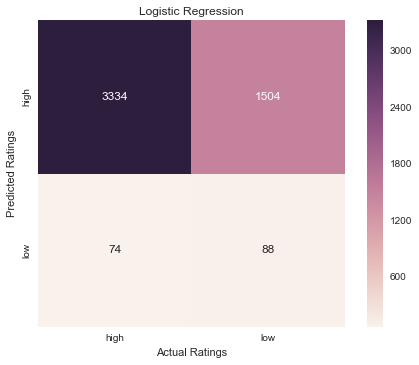

In [10]:
# Fancy boy confusion matrix
mat = metrics.confusion_matrix(y_test, logreg_predict)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True, 
            xticklabels=unique(y_test), yticklabels=unique(logreg_predict))
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Logistic Regression')

### Naive Bayes:
A multinomial naive bayes model using only the text data yields an accuracy of about 68.12% for our test set. This, once again, is only slightly greater than the base case, indicating another model without much predictive power.

In [11]:
# Fit naive bayes classifier on training data
mnb = MultinomialNB()
mnb_classifier = mnb.fit(x_train, y_train)

# Make predictions for test set
mnb_predict = mnb.predict(x_test)

In [12]:
# Model Metrics
print 'MULTINOMIAL NAIVE BAYES:'
print 'Precision:' + str(metrics.precision_score(y_test, mnb_predict, average = 'binary', pos_label='high'))
print 'Recall: ' + str(metrics.recall_score(y_test, mnb_predict, average = 'binary', pos_label='high'))
print 'Accuracy: ' + str(metrics.accuracy_score(y_test, mnb_predict))

MULTINOMIAL NAIVE BAYES:
Precision:0.682055399438
Recall: 0.9970657277
Accuracy: 0.6812


C:\Users\brook\Anaconda2\lib\site-packages\seaborn\matrix.py:151: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if yticklabels == []:


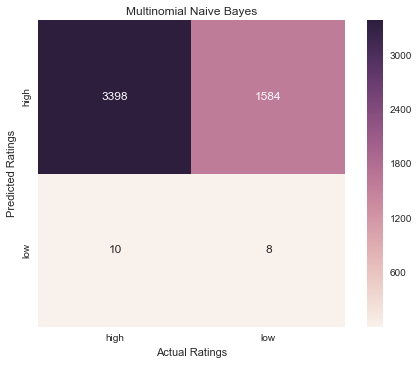

In [13]:
# Fancy boy confusion matrix
mat = metrics.confusion_matrix(y_test, mnb_predict)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True, 
            xticklabels=unique(y_test), yticklabels=unique(mnb_predict))
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Multinomial Naive Bayes')

### Conclusion
After comparing the prediction accuracy of both models to that of the base case, it is apparent that not much predictive power is gained from the numerical data. Both the logistic regression and multinomial naive bayes models predicted the test set with an accuracy of just over 68%, less than 1% better than the base case. It appears that the main problem with both models, and thus with the numeric data in general, is that they drastically overpredict the number of 'high' ratings and drastically underpredict the number of 'low' ratings.

## Task B: Model Using Reviews (Text Data) Only

### Approach:
Next, we will try to assess the predictive power of the text data from the actual reviews and compare it to that of the numerical data. To do this, we will isolate the text data, just as we isolated the numerical data in part A, and build a couple of models to make predictions. For time purposes, we will only take a sample of 10,000 reviews rather than use the entire data set when fitting and testing these models. The models will be fit to a training set containing 75% of the sample and then used to predict a test set containing the remaining 25%. We will compare the results to those found in part A to assess the predictive power of the text data relative to that of the numeric data.  

In [14]:
# Take random sample of 10,000 reviews from data set
sample = yelp.sample(10000, random_state=321)

# Split sample into train and test sets
trainB, testB = train_test_split(sample, test_size=0.25, random_state=123)

x_trainB = trainB['Review']
y_trainB = trainB['rating']

x_testB = testB['Review']
y_testB = testB['rating']

In [15]:
# Tokenize reviews in the training and test sets
vectorizer = CountVectorizer(analyzer = 'word', tokenizer= None, preprocessor = None, 
                             stop_words = None, max_features = None)

x_trainB = vectorizer.fit_transform(x_trainB)
x_testB = vectorizer.transform(x_testB)

### Naive Bayes:
A multinomial naive bayes model using the text data yields an accuracy of about 83.24% on our test set. This is significantly higher than the test accuracies that we saw for our two models that were fit using the numeric data. It is also significantly higher than the base case, indicating that the model has some predictive power.  

In [16]:
# Fit naive bayes classifier on training set
mnb_classifierB = MultinomialNB()
mnb_classifierB.fit(x_trainB, y_trainB)

# Make predictions for test set
mnb_predictB = mnb_classifierB.predict(x_testB)

In [17]:
# Model Metrics
print 'MULTINOMIAL NAIVE BAYES:'
print 'Precision:' + str(metrics.precision_score(y_testB, mnb_predictB, average = 'binary', pos_label='high'))
print 'Recall: ' + str(metrics.recall_score(y_testB, mnb_predictB, average = 'binary', pos_label='high'))
print 'Accuracy: ' + str(metrics.accuracy_score(y_testB, mnb_predictB))

MULTINOMIAL NAIVE BAYES:
Precision:0.857612267251
Recall: 0.907826086957
Accuracy: 0.8324


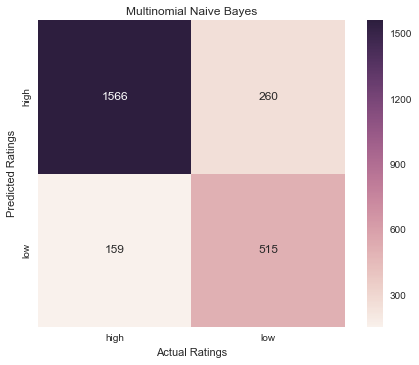

In [18]:
# Fancy boy confusion matrix
mat = metrics.confusion_matrix(y_testB, mnb_predictB)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True, 
            xticklabels=unique(y_testB), yticklabels=unique(mnb_predictB))
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Multinomial Naive Bayes')

### Logistic Regression:
A logistic regression model fit on the text data yields an accuracy of about 82.56%. This is on the order of what we saw from the naive bayes model fit on the same data and significantly higher than the models fit on the numeric data. 

In [19]:
# Fit logistic regression on training data
logreg_classifierB = linear_model.LogisticRegression().fit(x_trainB, y_trainB)

# Make predictions for test set
logreg_predictB = logreg_classifierB.predict(x_testB)

In [20]:
# Model Metrics
print 'LOGISTIC REGRESSION:'
print 'Precision:' + str(metrics.precision_score(y_testB, logreg_predictB, average = 'binary', pos_label='high'))
print 'Recall: ' + str(metrics.recall_score(y_testB, logreg_predictB, average = 'binary', pos_label='high'))
print 'Accuracy: ' + str(metrics.accuracy_score(y_testB, logreg_predictB))

LOGISTIC REGRESSION:
Precision:0.863508178229
Recall: 0.887536231884
Accuracy: 0.8256


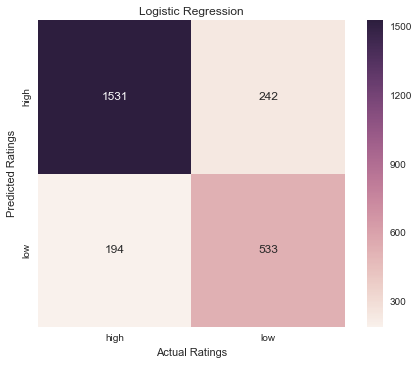

In [21]:
# Fancy boy confusion matrix
mat = metrics.confusion_matrix(y_testB, logreg_predictB)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True, 
            xticklabels=unique(y_testB), yticklabels=unique(logreg_predictB))
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Logistic Regression')

### Conclusion
Both models that were fit using the text data performed significantly better than the models that were fit using the numeric data. The multinomial naive bayes model predicted the test set with a slightly higher accuracy than the logistic regression model, but the difference was marginal. These results seem to indicate that the predictive power of the text data (reviews) is significantly greater than that of the numeric data. Different training and test sets were used for part A and part B, so it is possible that some of the difference could be attributed to that. However, given the scale of the differences in accuracy between the numeric models and the text models, the results appear to be conclusive.

## Task C: Hybrid Model (Numeric and Text Data)

### Approach:
Finally, we will fit a model using both the numeric data and the text data. This model will be a hybrid of the multinomial naive bayes model that was fit on the text data and the logistic regression model that was fit on the numeric data. First, we will use the naive bayes model to calculate the probability that each review has a 'high' rating from the text data. Then, we will add this information as a column in our data set that contains all of the numeric data and fit a logistic regression model. We will use this new model to predict the same test set from part B and compare the results to see if the numeric data adds to the predictive power relative to the text.

### Hypothesis:
Our hypothesis is that incorporating the numeric data will improve the accuracy of our model, but only marginally. We saw in part A that the numeric data alone has very little predictive power, so it seems unlikely that it will be able to add much to what we are already getting from the text data.

In [33]:
# Create new training and test sets using same sample from part B
x_trainC = trainB.drop(['stars', 'Review', 'rating'], axis=1)
y_trainC = trainB['rating']

x_testC = testB.drop(['stars', 'Review', 'rating'], axis=1)
y_testC = testB['rating']

In [40]:
# Obtain probabilities of 'high' and 'low' rating for each review from naive bayes text model
train_scoresB = mnb_classifierB.predict_proba(x_trainB).tolist()
test_scoresB = mnb_classifierB.predict_proba(x_testB).tolist()

def unzip(pairs):
    a_list = []
    b_list = []
    for pair in pairs:
        a_list.append(pair[0])
        b_list.append(pair[1])
    return a_list, b_list

train_highScoresB, train_lowScoresB = unzip(train_scoresB)
test_highScoresB, test_lowScoresB = unzip(test_scoresB)

In [36]:
# Add column of probabilities to training and test sets
x_trainC['TextScore'] = train_highScoresB
x_testC['TextScore'] = test_highScoresB

In [37]:
# Fit logistic regression model on training data
logreg = linear_model.LogisticRegression()
logreg_classifierC = logreg.fit(x_trainC, y_trainC)
logreg_predictC = logreg_classifierC.predict(x_testC)

In [38]:
# Model Metrics
print 'Precision:' + str(metrics.precision_score(y_testC, logreg_predictC, average = 'binary', pos_label='high'))
print 'Recall: ' + str(metrics.recall_score(y_testC, logreg_predictC, average = 'binary', pos_label='high'))
print 'Accuracy: ' + str(metrics.accuracy_score(y_testC, logreg_predictC))

Precision:0.860209135938
Recall: 0.906086956522
Accuracy: 0.8336


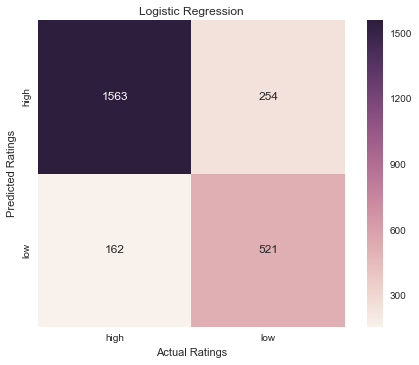

In [39]:
# Fancy boy confusion matrix
mat = metrics.confusion_matrix(y_testC, logreg_predictC)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True, 
            xticklabels=unique(y_testC), yticklabels=unique(logreg_predictC))
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Logistic Regression')

### Conclusion:
The model incorporating both the text and numeric data predicted the test set with an accuracy of about 83.36%. As we hypothesized, this is only marginally better than the accuracy of our naive bayes model that was fit on the text data exclusively. It seems that the numeric data adds almost nothing to the predictive power relative to the text data. 

## Task D: Unsupervised Sentiment Analysis

### Approach:
For task D, we will perform an unsupervised sentiment analysis on the reviews using SentiStrength and then use the results to fit a new model. SentiStrength will take each review and give it a positive sentiment score and a negative sentiment score. We will then use these scores, and these scores only, to fit a logistic regression model on a training set 75% of the reviews. The remaining 25% of reviews will be used as a test set that we will run the model on to assess its predictive power. Comparing these results to the results from part B should give us an idea of how much of the predictive power of the text data is captured by sentiment analysis.

### Hypothesis:
We expect that this model will not perform as well as the models from part B that use all of the text data. However, we anticipate that it will perform significantly better than the base case and the models from part A that use only the numeric data. This would mean that the unsupervised sentiment analysis captures a good deal of the predictive power from the text data but not all of it.

In [12]:
ss = pd.read_csv('YelpNoHeader+results.csv', header = None)
ss.head(1)

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,2,2,2,2,1,0,0,0,0,0,...,0,0,0,0,0,0,1,CLOSED This JB s locati...,2,-2


In [13]:
ss['rating'] = np.where(ss[0] >= 4, 'high','low')

In [14]:
trainD, testD = train_test_split(ss, test_size=0.25, random_state=123)

x_trainD = trainD[[21,22]]
y_trainD = trainD['rating']

x_testD = testD[[21,22]]
y_testD = testD['rating']

In [16]:
logreg = linear_model.LogisticRegression()
logreg_classifierD = logreg.fit(x_trainD, y_trainD)
logreg_predictD = logreg.predict(x_testD)

In [17]:
# Model Metrics
print 'Precision:' + str(metrics.precision_score(y_testD, logreg_predictD, average = 'binary', pos_label='high'))
print 'Recall: ' + str(metrics.recall_score(y_testD, logreg_predictD, average = 'binary', pos_label='high'))
print 'Accuracy: ' + str(metrics.accuracy_score(y_testD, logreg_predictD))

Precision:0.730088495575
Recall: 0.929439667951
Accuracy: 0.7206


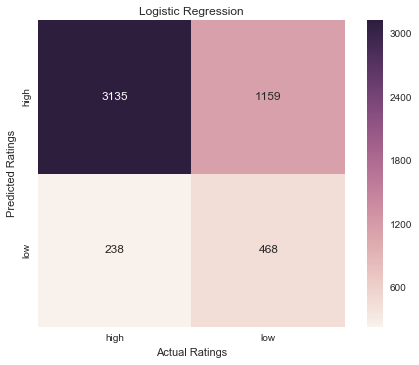

In [18]:
# Fancy boy confusion matrix
mat = metrics.confusion_matrix(y_testD, logreg_predictD)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True, 
            xticklabels=unique(y_testD), yticklabels=unique(logreg_predictD))
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Logistic Regression')

### Conclusion:
The logistic regression model that was fit using the sentiment scores predicted our test set with an accuracy of about 72.06%. This confirms our hypothesis that the model would perform better than the models that were fit on the numeric data but not as well as the models that were fit on the text data. However, the difference between the accuracy from the numeric models and the accuracy of the sentiment score model is not as substantial as we expected. It is possible that the sentiment score model could be improved by changing some parameters in SentiStrength, such as the weights of certain words or phrases. Nevertheless, it appears that unsupervised sentiment analysis could be an effective tool to use if the data set is too large to use all of the text data or if an unsupervised approach is necessary.

## Task E: PMI Approach

In [10]:
import nltk
from nltk import word_tokenize
from nltk.tokenize import RegexpTokenizer

yelpsub = yelp.sample(500)

# Tokenize all job descriptions from sample
yelpsub['tokenized_strip'] = yelpsub.apply(lambda row: row['Review'].decode('utf-8').strip(),axis=1)
yelpsub['tokenized'] = yelpsub.apply(lambda row: nltk.word_tokenize(row['tokenized_strip']),axis=1)

In [11]:
reviews = []
for index, value in yelpsub.iterrows():
    reviews.append(value['tokenized'])

In [12]:
reviews_lower = []
for review in reviews:
    review_lower = []
    for token in review:
        token_lower = token.lower()
        review_lower.append(token_lower)
    reviews_lower.append(review_lower)

In [13]:
reviews = reviews_lower

all_count = 0
for review in reviews:
    for token in review:
        all_count += 1

all_count

72057

In [14]:
single_dict = {}
for review in reviews:
    for token in review:
        if token in single_dict:
            single_dict[token] += 1
        else:
            single_dict[token] = 1

In [15]:
bigrams = []
for review in reviews:
    small_list = []
    for i in range(len(review[0:-1])):
        small_list.append((review[i], review[i+1]))
    bigrams.append(small_list)

bigram_dict = {}
for review in bigrams:
    for tup in review:
        tup_space = ' '.join(tup)
        if tup_space in bigram_dict:
            bigram_dict[tup_space] += 1
        else:
            bigram_dict[tup_space] = 1

In [16]:
bigram_count = 0
for review in bigrams:
    for bigram in review:
        bigram_count += 1
        
bigram_count

71557

In [17]:
import math

zipped = []
for bigram in bigram_dict: 
    bigram_sep = bigram.split()
    p_bi = bigram_dict[bigram] / (bigram_count * 1.0)
    p_word1 = single_dict[bigram_sep[0]] / (all_count * 1.0)
    p_word2 = single_dict[bigram_sep[1]] / (all_count * 1.0)
    pmi = math.log(p_bi / (p_word1 * p_word2) * 1.0)
    
    zipped.append((bigram, bigram_dict[bigram], bigram_sep[0], single_dict[bigram_sep[0]], bigram_sep[1], single_dict[bigram_sep[1]], pmi))

In [18]:
zipped_sorted = sorted(zipped, key=lambda x: x[6])
zipped_sorted.reverse()
for a,b,c,d,e,f,g in zipped_sorted[300:320]:
    print a, g

crammed inside.i 10.4990287085
wildly uneven 10.4990287085
sporting events 10.4990287085
minor infractions 10.4990287085
4-inch diameter 10.4990287085
margherita pizza..tasty 10.4990287085
varying degrees 10.4990287085
tex mex 10.4990287085
management prospective 10.4990287085
fitting tribute 10.4990287085
aunt chilada 10.4990287085
pancetta crusted 10.4990287085
ti coz.the 10.4990287085
pei wei 10.4990287085
warped reasoning 10.4990287085
marinara sauce.the 10.4990287085
contacted gabi 10.4990287085
cantaloupe aqua 10.4990287085
nouveau premium 10.4990287085
san francisco 10.4990287085
